Generate nutrient initial files to use in MITgcm runs from data.

Generate tracer initial conditions for MITgcm from Falkor and Line C data
=========================================================================

Profile interpolated from Pathways Curise 2013 at Barkley Canyon data and Dave Capelle's methane and nitrous oxide data from Line C May and September 2012 and 2013. You can also choose between data interp profile and linear interp.
K. Ramos-Musalem

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import seaborn as sns
import struct

In [3]:
sns.set_context('notebook')
sns.set_style('ticks')

In [5]:
def iniTracer(xsize, ysize, IniDepth, IniProfile, InterpDepth):
    
    InterpProfile = np.interp(InterpDepth, IniDepth , IniProfile)
    
    tracer = np.zeros((xsize, ysize, len(InterpDepth)))
    
    for ii in np.arange(xsize):
        
        for jj in np.arange(ysize):
            
            for kk in np.arange(len(InterpDepth)):
        
                tracer[ii,jj,kk]=InterpProfile[kk] 
            

    return tracer

In [6]:
def iniTracerLin(xsize, ysize, TopVal,BotVal, Depth ):
    
    # Generate linear nutrient profile (i.e. C(Depth)= IniVal*Depth) 
    
    M = (BotVal-TopVal)/(Depth[len(Depth)-1]-Depth[0])
    b = (TopVal - M*Depth[0])*np.ones((len(Depth),1))
    
    tracer = np.zeros((xsize, ysize, len(Depth)))
    
    for ii in np.arange(xsize):
        for jj in np.arange(ysize):
            for kk in np.arange(len(Depth)):
                tracer[ii,jj,kk]=M*Depth[kk]+b[kk] 
            

    return tracer

In [7]:
def iniTracerLinHor(xsize, zsize, TopVal,BotVal, yvec ):
    
    # Generate linear nutrient profile (i.e. C(yvec)= IniVal*yvec) 
    
    M = (BotVal-TopVal)/(yvec[len(yvec)-1]-yvec[0])
    b = (TopVal - M*yvec[0])*np.ones((len(yvec),1))
    
    tracer = np.zeros((xsize,len(yvec),zsize))
    
    for ii in np.arange(xsize):
        for jj in np.arange(zsize):
            for kk in np.arange(len(yvec)):
                tracer[ii,kk,jj]=M*yvec[kk]+b[kk] 
            

    return tracer

In [8]:
def iniTracerCnt(xsize, ysize, CntVal, Depth ):
    # Generate constant nutrient profile  
    
    tracer = np.ones((xsize, ysize, len(Depth)))
    tracer = tracer*CntVal
    

    return tracer

In [9]:
# Profile values form interp nutrient data from Falkor (see NutrientProfilesFalkor.ipynb)
dt = np.dtype('>f8')  # float 64 big endian

nx = 616
ny = 360
nz = 104

# Depth values
depth = [5.,20.,30.,50.,70.,100.,150.,170.,200.,300.,400.,500.,600.,700.,800.,1000.,1200.] #values form interp nutrient data 
                                                                                            # from Falkor (see NutrientProfilesFalkor.ipynb)
depthLineC = [0.,50.,100.,150.,200.,250.,300.,350.,400.,450.,500.,550.,600.,650.,700.,750.]

depthDIC = [10.0, 15.0, 20.0, 25.0, 30.0, 40.0, 50.0, 70.0, 85.0, 100.0, 125.0, 
            150.0, 160.0, 170.0, 185.0, 325.0, 350.0, 400.0, 425.0, 
            450.0, 500.0, 550.0, 600.0, 700.0, 800.0, 1000.0, 1200.0] 
# I had to use more levels to interpolate DIC because there are lots of NaNs

depthTmp = [3.9, 5.0, 10.0, 15.0, 20.0, 25.0, 30.0, 40.0, 50.0, 70.0, 85.0, 100.0, 125.0, 
            150.0, 160.0, 170.0, 185.0, 200.0, 225.0, 250.0, 300.0, 325.0, 350.0, 400.0, 
            425.0, 450.0, 500.0, 550.0, 600.0, 700.0, 800.0, 1000.0, 1200.0]

#zi0 = (5,10,	15,	20,	25,	30,	35,	40,	45,	50,	55,	60,	65,	70,	75,	80,	85,	90,	95,	100,105,
#      110,115,120,125,130,135,140,145,150,155,160,165,170,180,190,200,210,220,230,240,250,
#      260,280,300,320,340,360,380,400,420,440,460,480,500,520,540,560,580,600,620,640,660,#
#      680,700,720,740,760,780,800,820,840,860,880,900,920,940,960,980,1000,1020,1040,1060,
#      1080,1100,1120,1140,1160,1180,1200) # Original depth levels, delete soon

zi = np.concatenate((np.arange(5,260,5), np.arange(260,360,10), np.arange(360,1220,20)))
print(zi, np.shape(zi))

[   5   10   15   20   25   30   35   40   45   50   55   60   65   70
   75   80   85   90   95  100  105  110  115  120  125  130  135  140
  145  150  155  160  165  170  175  180  185  190  195  200  205  210
  215  220  225  230  235  240  245  250  255  260  270  280  290  300
  310  320  330  340  350  360  380  400  420  440  460  480  500  520
  540  560  580  600  620  640  660  680  700  720  740  760  780  800
  820  840  860  880  900  920  940  960  980 1000 1020 1040 1060 1080
 1100 1120 1140 1160 1180 1200] (104,)


Text(0.5,1,'Salinity initial profile ')

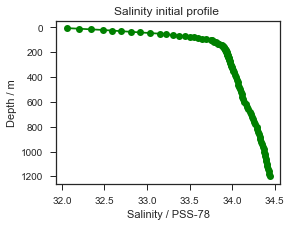

In [8]:
#Salinity

sal = [32.05565615,  32.47904982,  32.69883153,  33.14754095,
        33.45287546,  33.74755425,  33.89389881,  33.9139597 ,
        33.93728968,  33.98439263,  34.04611345,  34.09233602,
        34.14232788,  34.22413622,  34.28826251,  34.37998532,  34.4410795 ] #Falkor Salinity

Sal = iniTracer(nx,ny,depth,sal,zi)

# Save binary file
tmpfile = "%dx%dx%d/Barkley_sal_%dzlev_%dx%d.bin" %(nx,ny,nz,nz,nx,ny)
fileobj = open(tmpfile,mode='wb')
Sal2 = Sal.transpose((2,0,1)) # To keep fortran order when writing as C binarynp.asfortranarray(Sal)
Sal2.astype(dt).tofile(fileobj,"")
fileobj.close()


# PLOT
fig, ax = plt.subplots(1,1,figsize=(4,3))
ax.plot(np.squeeze(Sal[60,45,:]),zi,'go-')
ax.invert_yaxis()
plt.xlabel('Salinity / PSS-78')
plt.ylabel('Depth / m')
plt.title('Salinity initial profile ')


Text(0.5,1,'Nitrate initial profile ')

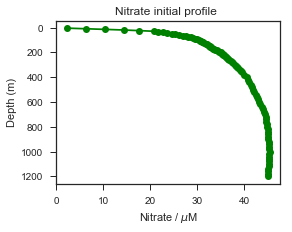

In [9]:
#Nitrate

nit = [  2.20769231,  14.30606356,  20.69884474,  24.54682499,
        27.64221491,  30.40401935,  32.60791595,  33.23055095,
        34.93009381,  37.96639598,  40.48248953,  41.87936656,
        43.16092676,  44.42630919,  44.86319564,  45.33917039,  45.01343725] #Falkor Nitrate, umol/L

Nitrate = iniTracer(nx,ny,depth,nit,zi)
               
# Save binary file
tmpfile = "%dx%dx%d/Barkley_nit_%dzlevs_%dx%d.bin" %(nx,ny,nz,nz,nx,ny)
fileobj = open(tmpfile,mode='wb')
Nitrate2 = Nitrate.transpose((2,0,1)) # To keep fortran order when writing as C binary
Nitrate2.astype(dt).tofile(fileobj,"")
fileobj.close()


# Plot
fig, ax = plt.subplots(1,1,figsize=(4,3))
ax.plot(np.squeeze(Nitrate[60,45,:]),zi,'go-')
ax.invert_yaxis()
plt.xlabel('Nitrate / $\mu$M')
plt.ylabel('Depth (m)')
plt.title('Nitrate initial profile ')


Text(0.5,1,'Oxygen initial profile ')

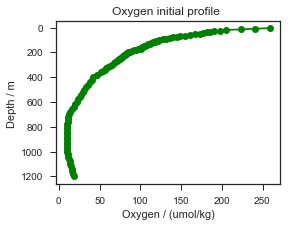

In [23]:
# Oxygen

oxy = [ 258.64692308,  205.30523866,  189.93474682,  173.32762752,
        148.99494704,  123.39376698,  104.07073273,  100.34682448,
         84.75278265,   65.32870403,   42.38594405,   31.24731648,
         22.04183918,   12.32014822,    9.56728914,   10.02871031,
         18.18188635] #Falkor Oxygen, umol/kg

Oxygen = iniTracer(nx,ny,depth,oxy,zi)

# Save binary file
tmpfile = "%dx%dx%d/Barkley_oxy_%dzlev_%dx%d.bin" %(nx,ny,nz,nz,nx,ny)
fileobj = open(tmpfile,mode='wb')
Oxygen2 = Oxygen.transpose((2,0,1)) # To keep fortran order when writing as C binary
Oxygen2.astype(dt).tofile(fileobj,"")
fileobj.close()        

### PLOT Contour

fig, ax = plt.subplots(1,1,figsize=(4,3))
ax.plot(np.squeeze(Oxygen[60,45,:]),zi,'go-')
ax.invert_yaxis()
plt.xlabel('Oxygen / (umol/kg)')
plt.ylabel('Depth / m ')
plt.title('Oxygen initial profile ')

Text(0.5,1,'Silicate initial profile ')

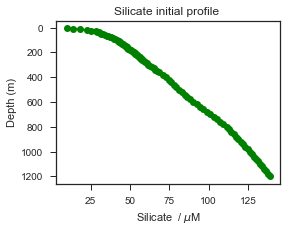

In [24]:
# Silicate
sil = [ 9.77487179,   22.40324386,   28.481157  ,   31.81179168,
         36.35084393,   41.51053289,   47.62601443,   48.57082304,
         52.54408413,   61.52273871,   73.08433615,   81.12181574,
         90.16770523,  101.05308596,  111.55221474,  126.39029233,
        138.72363852 ] #Falkor Silicate

Silicate = iniTracer(nx,ny,depth,sil,zi)

# Save binary file
tmpfile = "%dx%dx%d/Barkley_sil_%dzlev_%dx%d.bin" %(nx,ny,nz,nz,nx,ny)
fileobj = open(tmpfile,mode='wb')
Silicate2 = Silicate.transpose((2,0,1)) # To keep fortran order when writing as C binary
Silicate2.astype(dt).tofile(fileobj,"")
fileobj.close()              

# Plot

fig, ax = plt.subplots(1,1,figsize=(4,3))
ax.plot(np.squeeze(Silicate[60,45,:]),zi,'go-')
ax.invert_yaxis()
plt.xlabel('Silicate  / $\mu$M')    
plt.ylabel('Depth (m)')
plt.title('Silicate initial profile ')

Text(0.5,1,'Phosphate initial profile ')

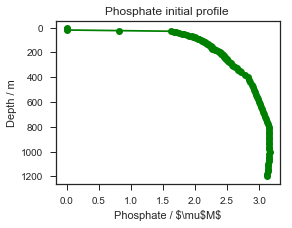

In [26]:
# Phosphate

pho = [0, 0,  1.6205616 ,  1.79738767,  1.94555393,
       2.08709737,  2.24576282,  2.27144092,  2.39342327,  2.57196961,
       2.82463189,  2.92081108,  2.99713342,  3.06841061,  3.14757836,
       3.16063801,  3.12403118  ] #Falkor Phosphate

Phosphate = iniTracer(nx,ny,depth,pho,zi)
              
# Save binary file
tmpfile = "%dx%dx%d/Barkley_pho_%dzlev_%dx%d.bin" %(nx,ny,nz,nz,nx,ny)
fileobj = open(tmpfile,mode='wb')
Phosphate2 = Phosphate.transpose((2,0,1)) # To keep fortran order when writing as C binary
Phosphate2.astype(dt).tofile(fileobj,"")
fileobj.close()              

# Plot 
fig, ax = plt.subplots(1,1,figsize=(4,3))
ax.plot(np.squeeze(Phosphate[60,45,:]),zi,'go-')
ax.invert_yaxis()
plt.xlabel('Phosphate / $\mu$M$')
plt.ylabel('Depth / m')
plt.title('Phosphate initial profile ')

Text(0.5,1,'Methane initial profile ')

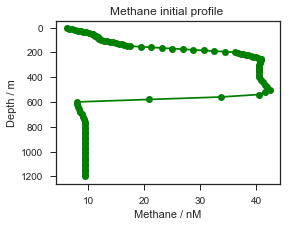

In [27]:
# Methane

met = [ 5.7       ,  10.64469773,  12.39183632,  17.50460996,
        36.27632856,  40.79841802,  40.55482783,  40.51003523,
        40.46664286,  41.40465804,  42.34615163,  40.09929176,
        7.96460677,   8.29779559,   8.8488978 ,   9.4  ] # LineC Methane

Methane = iniTracer(nx,ny,depthLineC,met,zi)
             
# Save binary file
tmpfile = "%dx%dx%d/LineCSep2013_met_%dzlev_%dx%d.bin" %(nx,ny,nz,nz,nx,ny)
fileobj = open(tmpfile,mode='wb')
Methane2 = Methane.transpose((2,0,1)) # To keep fortran order when writing as C binary
Methane2.astype(dt).tofile(fileobj,"")
fileobj.close()              

# Plot

fig, ax = plt.subplots(1,1,figsize=(4,3))
ax.plot(np.squeeze(Methane[60,45,:]),zi,'go-')
ax.invert_yaxis()
plt.xlabel('Methane / nM')    
plt.ylabel('Depth / m')
plt.title('Methane initial profile ')

Text(0.5,1,'Nitrous oxide initial profile ')

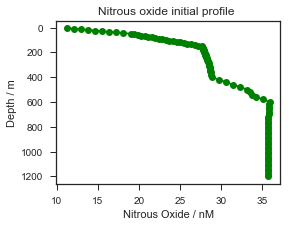

In [10]:
# Nitrous Oxide

nox = [  10.35      ,  19.00521367,  23.30548951,  27.66736277,
        28.00249004,  28.3022331 ,  28.55923913,  28.73341284,
        28.91225443,  31.05146831,  33.1970117 ,  33.93446295,
        35.92803017,  35.91032064,  35.83016032,  35.75  ] # LineC Methane

NitOx = iniTracer(nx,ny,depthLineC,nox,zi)
         
# Save binary file
tmpfile = "%dx%dx%d/LineCSep2013_nox_%dzlev_%dx%d.bin" %(nx,ny,nz,nz,nx,ny)
fileobj = open(tmpfile,mode='wb')
NitOx2 = NitOx.transpose((2,0,1)) # To keep fortran order when writing as C binary
NitOx2.astype(dt).tofile(fileobj,"")
fileobj.close()              

# Plot 
fig, ax = plt.subplots(1,1,figsize=(4,3))
ax.plot(np.squeeze(NitOx[60,45,:]),zi,'go-')
ax.invert_yaxis()
plt.xlabel('Nitrous Oxide / nM')
plt.ylabel('Depth / m')
plt.title('Nitrous oxide initial profile ')

Text(0.5,1,'DIC initial profile ')

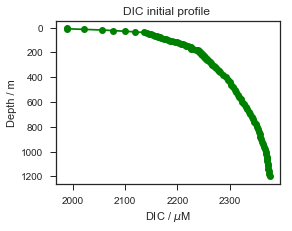

In [11]:
# DIC

dic = [1988.137, 2020.864, 2055.613, 2077.559, 2099.430, 2136.736, 2145.807,
       2160.378,  2169.597,  2182.130,  2203.547,    2220.859,
       2226.993,   2225.535,  2239.758,   2272.775,  2279.751,  2293.704,
       2298.125,  2301.907 ,   2309.473,  2317.095,  2324.727,
       2339.422,  2352.259,  2369.299,  2376.510] # Falkor DIC, bottle measurements, interp from salinity

DIC = iniTracer(nx,ny,depthDIC,dic,zi)
         
# Save binary file
tmpfile = "%dx%dx%d/Barkley_DIC_%dzlev_%dx%d.bin" %(nx,ny,nz,nz,nx,ny)
fileobj = open(tmpfile,mode='wb')
DIC2 = DIC.transpose((2,0,1)) # To keep fortran order when writing as C binary
DIC2.astype(dt).tofile(fileobj,"")
fileobj.close()              

# Plot 
fig, ax = plt.subplots(1,1,figsize=(4,3))
ax.plot(np.squeeze(DIC[60,45,:]),zi,'go-')
ax.invert_yaxis()
plt.xlabel('DIC / $\mu$M')
plt.ylabel('Depth / m')
plt.title('DIC initial profile ')

Text(0.5,1,'Alkalinity initial profile ')

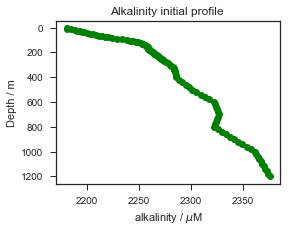

In [12]:
# Alkalinity

alk = [2180.908,  2184.611,  2188.541,  2191.024,   2193.498,  2197.718,  2202.834,
       2214.932,  2224.044,  2239.146,  2252.351,   2257.815,  2258.880,  2258.627,  
       2260.944,  2283.506,  2284.351,  2286.042,   2289.345,  2293.262,  2301.098, 
       2311.357,  2322.016,  2327.346,  2321.732,   2361.124,  2375.323] 
# Falkor Alkalinity, bottle measurements, interp from salinity

alkalinity = iniTracer(nx,ny,depthDIC,alk,zi)
         
# Save binary file
tmpfile = "%dx%dx%d/Barkley_Alk_%dzlev_%dx%d.bin" %(nx,ny,nz,nz,nx,ny)
fileobj = open(tmpfile,mode='wb')
alkalinity2 = alkalinity.transpose((2,0,1)) # To keep fortran order when writing as C binary
alkalinity2.astype(dt).tofile(fileobj,"")
fileobj.close()              

# Plot 
fig, ax = plt.subplots(1,1,figsize=(4,3))
ax.plot(np.squeeze(alkalinity[60,45,:]),zi,'go-')
ax.invert_yaxis()
plt.xlabel('alkalinity / $\mu$M')
plt.ylabel('Depth / m')
plt.title('Alkalinity initial profile ')

Text(0.5,1,'Temperature initial profile ')

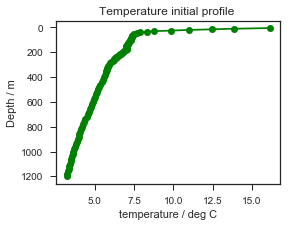

In [10]:
# Temperature

temp = [16.223,      16.12273077, 13.84015885, 12.46905338, 10.98482542,
        9.88305218,  8.75295081,  7.90499081,  7.50464058,  7.36712675,  7.32807074,
        7.29359846,  7.14318651,  7.00858172,  6.96357151,  7.08054167,  6.93332222,
        6.77165556,  6.52785872,  6.29,        5.90254613,  5.8058254 ,  5.72869246,
        5.57442659,  5.48808913,  5.39945054,  5.22217336,  5.04663762 , 4.8713901,
        4.54855423,  4.19431287,  3.63221461,  3.21432261]
# Falkor Temp from Debbie

temperature = iniTracer(nx,ny,depthTmp,temp,zi)
         
# Save binary file
tmpfile = "%dx%dx%d/Barkley_Tmp_%dzlev_%dx%d.bin" %(nx,ny,nz,nz,nx,ny)
fileobj = open(tmpfile,mode='wb')
temperature2 = temperature.transpose((2,0,1)) # To keep fortran order when writing as C binary
temperature2.astype(dt).tofile(fileobj,"")
fileobj.close()              

# Plot 
fig, ax = plt.subplots(1,1,figsize=(4,3))
ax.plot(np.squeeze(temperature[60,45,:]),zi,'go-')
ax.invert_yaxis()
plt.xlabel('temperature / deg C')
plt.ylabel('Depth / m')
plt.title('Temperature initial profile ')

Text(0.5,1,'salinity initial profile ')

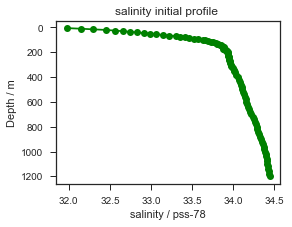

In [13]:
# Salinity form bottles

sal = [ 31.973,      31.97455128, 32.14363005, 32.29472647, 32.45515679,
        32.55647699, 32.65745322, 32.82968799, 32.98849269, 33.29924116, 33.46572156,
        33.63072897, 33.78824405, 33.86513148, 33.88408962, 33.87958333, 33.91457037,
        33.93012593, 33.94037748, 33.947     , 33.97006273, 33.99015873, 34.01198413,
        34.05563492, 34.07077375, 34.08424094, 34.11117532, 34.13581287, 34.1600703,
        34.22160896, 34.28401188, 34.38931446, 34.44126756]


# Falkor Temp from Debbie

salinity = iniTracer(nx,ny,depthTmp,sal,zi)
         
# Save binary file
tmpfile = "%dx%dx%d/Barkley_SalB_%dzlev_%dx%d.bin" %(nx,ny,nz,nz,nx,ny)
fileobj = open(tmpfile,mode='wb')
salinity2 = salinity.transpose((2,0,1)) # To keep fortran order when writing as C binary
salinity2.astype(dt).tofile(fileobj,"")
fileobj.close()              

# Plot 
fig, ax = plt.subplots(1,1,figsize=(4,3))
ax.plot(np.squeeze(salinity[60,45,:]),zi,'go-')
ax.invert_yaxis()
plt.xlabel('salinity / pss-78')
plt.ylabel('Depth / m')
plt.title('salinity initial profile ')

Let's check what we wrote...

In [14]:
fileNAME = "%dx%dx%d/Barkley_Tmp_%dzlev_%dx%d.bin" %(nx,ny,nz,nz,nx,ny)
tempp=np.fromfile(fileNAME, dt)

In [15]:
temppp=np.reshape(tempp,(nx,ny,len(zi)),order='F')
np.shape(temppp)

(616, 360, 104)

In [16]:
print(max(tempp))

16.12273077


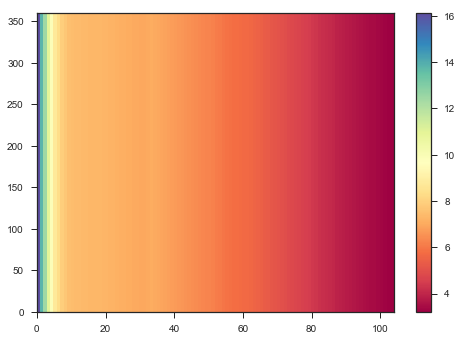

In [17]:
plt.pcolor(temppp[80,:,:], cmap='Spectral')
plt.colorbar()

In [18]:
delz = np.array([5.,5.,5.,5.,5.,5.,5.,5.,5.,5.,5.,5.,5.,5.,5.,5.,5.,5.,5.,5.,5.,5.,
                 5.,5.,5.,5.,5.,5.,5.,5.,5.,5.,5.,5.,10.,10.,10.,10.,10.,10.,10.,10.,10.,
                 20.,20.,20.,20.,20.,20.,20.,20.,20.,20.,20.,20.,20.,20.,20.,20.,20.,20.,
                 20.,20.,20.,20.,20.,20.,20.,20.,20.,20.,20.,20.,20.,20.,20.,20.,20.,20.,
                 20.,20.,20.,20.,20.,20.,20.,20.,20.,20.,20.])
np.shape(delz)

(90,)

In [19]:
print(zi[1:]-zi[:-1])
np.shape(zi[1:]-zi[:-1])

[ 5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5
  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5
  5  5  5 10 10 10 10 10 10 10 10 10 10 20 20 20 20 20 20 20 20 20 20 20
 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20
 20 20 20 20 20 20 20]


(103,)

In [20]:
zi0 = np.array([0,5,10,	15,	20,	25,	30,	35,	40,	45,	50,	55,	60,	65,	70,	75,	80,	85,	90,	95,	100,105,
                110,115,120,125,130,135,140,145,150,155,160,165,170,180,190,200,210,220,230,240,250,
                260,280,300,320,340,360,380,400,420,440,460,480,500,520,540,560,580,600,620,640,660,#
                680,700,720,740,760,780,800,820,840,860,880,900,920,940,960,980,1000,1020,1040,1060,
                1080,1100,1120,1140,1160,1180,1200]) 

print(zi0[1:]-zi0[:-1])
np.shape(zi0[1:]-zi0[:-1])

[ 5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5
  5  5  5  5  5  5  5  5  5  5 10 10 10 10 10 10 10 10 10 20 20 20 20 20
 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20
 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20]


(90,)

In [21]:
delz-(zi0[1:]-zi0[:-1])

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.])